# Single Index Model


In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from ipywidgets import interact
import yfinance as yf
import scipy.optimize as sc
from pandas_datareader import data as pdr
import datetime as dt
import statsmodels.api as sm
yf.pdr_override()

In [149]:
rf=0.05
stocks=['NFLX','LMT','AMZN']
market=['^GSPC']
end=dt.datetime.now()
start=end-dt.timedelta(days=365*5)

In [150]:
def getStockData(stocks,market,start,end):
    stock_data=pdr.get_data_yahoo(stocks,start,end)
    marketData=pdr.get_data_yahoo(market,start,end)
    return stock_data,marketData

In [151]:
def getDailyReturns(stock_data,marketData):
    daily_returns=stock_data['Adj Close'].pct_change()
    daily_returns=(daily_returns.dropna())-rf
    marketReturns=marketData['Adj Close'].pct_change()
    marketReturns=marketReturns.dropna()-rf
    return daily_returns,marketReturns

In [152]:
stock_data=getStockData(stocks,market,start,end)[0]
marketData=getStockData(stocks,market,start,end)[1]
daily_returns=getDailyReturns(stock_data,marketData)[0]
marketReturns=getDailyReturns(stock_data,marketData)[1]

[*********************100%%**********************]  3 of 3 completed

c:\Users\Rama Balasubramanian\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
c:\Users\Rama Balasubramanian\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
c:\Users\Rama Balasubramanian\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



[*********************100%%**********************]  1 of 1 completed

c:\Users\Rama Balasubramanian\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



[*********************100%%**********************]  3 of 3 completed

c:\Users\Rama Balasubramanian\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
c:\Users\Rama Balasubramanian\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
c:\Users\Rama Balasubramanian\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



[*********************100%%**********************]  1 of 1 completed


c:\Users\Rama Balasubramanian\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


In [153]:
df1=pd.DataFrame(daily_returns)
df2=pd.DataFrame(marketReturns)
df2=df2.rename(columns={'Adj Close':'^GSPC'})
df=pd.concat([df1,df2],axis=1)

In [154]:
expected_market_return=marketReturns.mean()
betas={}
alphas={}
residuals={}
X=sm.add_constant(df['^GSPC'])
for i in stocks:
    y=df[i]
    model=sm.OLS(y,X)
    results=model.fit()
    betas[i]=results.params['^GSPC'].round(3)
    alphas[i]=results.params['const'].round(3)
    residuals[i]=y-(alphas[i]+betas[i]*df['^GSPC'])
betas=list(betas.values())
alphas=list(alphas.values())
residuals

{'NFLX': Date
 2019-04-23    0.002534
 2019-04-24   -0.018196
 2019-04-25   -0.015785
 2019-04-26    0.012466
 2019-04-29   -0.009562
                 ...   
 2024-04-11    0.008406
 2024-04-12    0.005154
 2024-04-15   -0.013169
 2024-04-16    0.018802
 2024-04-17   -0.000637
 Length: 1256, dtype: float64,
 'LMT': Date
 2019-04-23    0.050984
 2019-04-24   -0.007744
 2019-04-25   -0.003709
 2019-04-26   -0.004683
 2019-04-29   -0.000019
                 ...   
 2024-04-11   -0.003393
 2024-04-12    0.004583
 2024-04-15    0.013217
 2024-04-16    0.003834
 2024-04-17    0.007247
 Length: 1256, dtype: float64,
 'AMZN': Date
 2019-04-23    0.010111
 2019-04-24   -0.008914
 2019-04-25    0.000856
 2019-04-26    0.020648
 2019-04-29   -0.007194
                 ...   
 2024-04-11    0.008950
 2024-04-12    0.000236
 2024-04-15   -0.000495
 2024-04-16    0.000754
 2024-04-17   -0.004778
 Length: 1256, dtype: float64}

In [155]:
def portfolioReturn(active_portfolio_weights,alphas,betas,expected_market_return):
    market_portfolio_weight=1-np.sum(active_portfolio_weights)
    alpha_complete_portfolio=np.dot(active_portfolio_weights,alphas)
    beta_complete_portfolio=np.dot(active_portfolio_weights,betas)+np.dot(market_portfolio_weight,1)
    portfolio_return=alpha_complete_portfolio+(beta_complete_portfolio+1)*expected_market_return
    return portfolio_return

In [156]:
def portfolioVariance(active_portfolio_weights,betas,stock_residual_variance,market_returns_variance):
    market_portfolio_weight=1-np.sum(active_portfolio_weights)
    beta_complete_portfolio=np.dot(active_portfolio_weights,betas)+np.dot(market_portfolio_weight,1)
    weighted_stock_residual_variance=np.dot(active_portfolio_weights**2,stock_residual_variance)
    portfolio_variance=beta_complete_portfolio**2*market_returns_variance+weighted_stock_residual_variance
    return portfolio_variance

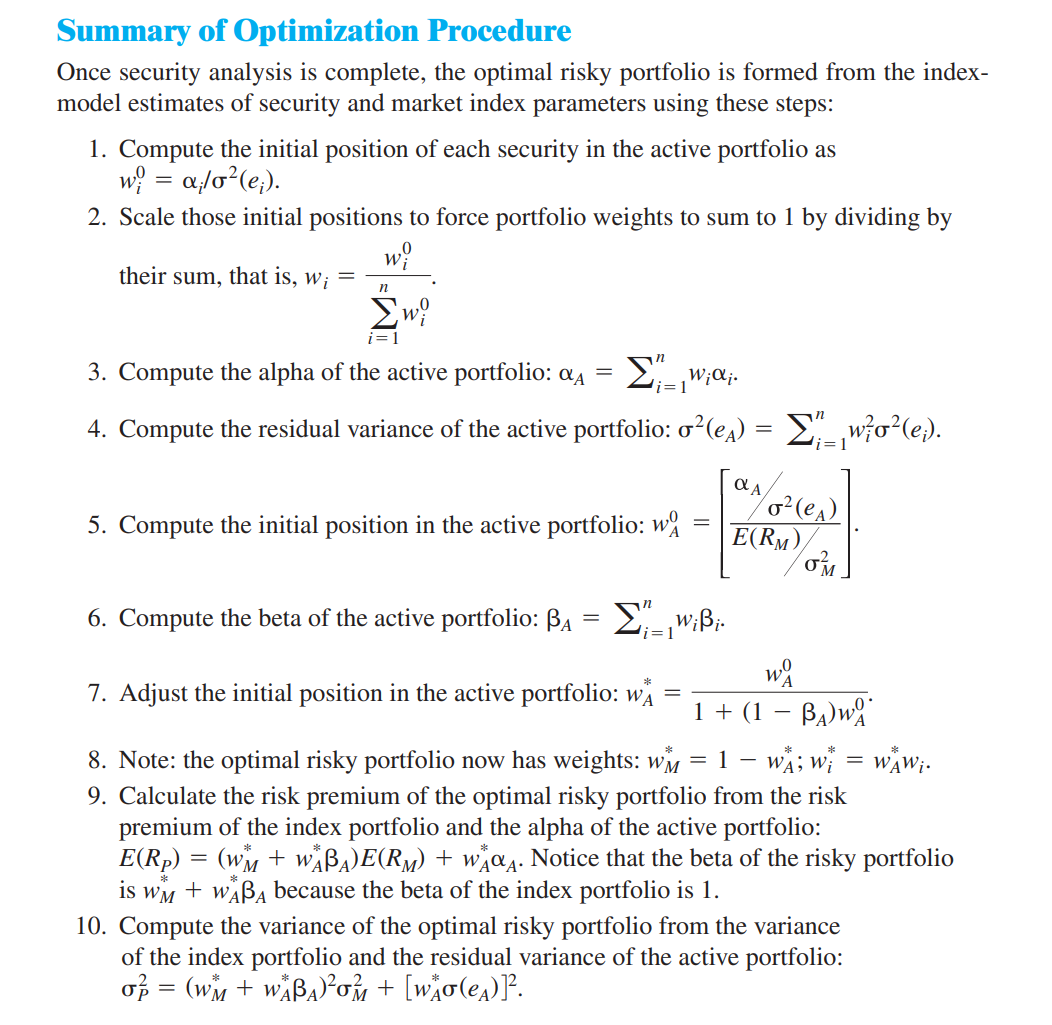

In [157]:
stock_residual_variance={}
for i in stocks:
    stock_residual=np.var(residuals[i])
    stock_residual_variance[i]=stock_residual
stock_residual_variance=list(stock_residual_variance.values())
initial_weights=[]
for i in range(len(stocks)):
    w_i=alphas[i]/stock_residual_variance[i]
    initial_weights.append(w_i)

initial_weights=initial_weights/np.sum(initial_weights)

# Optimal Risky Portfolio

In [158]:
alpha_active_portfolio=np.sum(initial_weights*alphas)
residual_variance_active_portfolio=np.sum((initial_weights)**2*stock_residual_variance)
market_returns_variance=np.var(marketReturns)
initial_weight_active_portfolio=((alpha_active_portfolio/residual_variance_active_portfolio)/(expected_market_return/market_returns_variance))
beta_active_portfolio=np.sum(initial_weights*betas)
optimal_weight_active_portfolio=(initial_weight_active_portfolio)/(1+(1-beta_active_portfolio)*initial_weight_active_portfolio)
optimal_weight_market_portfolio=1-optimal_weight_active_portfolio
optimal_weight_stocks=optimal_weight_active_portfolio*(initial_weights)

In [159]:
optimal_portfolio_return=portfolioReturn(optimal_weight_stocks,alphas,betas,expected_market_return)
optimal_portfolio_variance=portfolioVariance(optimal_weight_stocks,betas,stock_residual_variance,market_returns_variance)

# Minimum Variance portfolio

In [160]:
n=len(betas)
constraints=({'type':'eq','fun':lambda x:1-np.sum(x)})
bounds=tuple((0,1) for _ in range(n))
result=sc.minimize(portfolioVariance,n*[1./n],args=(betas,stock_residual_variance,market_returns_variance),
                   method='SLSQP',bounds=bounds,constraints=constraints)
result

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.00027220511746277093
       x: [ 3.333e-01  3.333e-01  3.333e-01]
     nit: 1
     jac: [ 4.391e-04  7.661e-06  2.114e-04]
    nfev: 4
    njev: 1

# Tracking portfolio
Tracking portfolio: Using the market portfolio M and T-bill 
generate a portfolio with a beta same as Portfolio's beta


In [161]:
portfolio_residual_df=pd.DataFrame(index=residuals[stocks[0]].index)
portfolio_residual_df['Portfolio Residual']=sum(residuals[stock]*weight for stock,weight in zip(stocks,optimal_weight_stocks))
portfolio_residual_df

,Portfolio Residual
Date,
2019-04-23,0.015259
2019-04-24,-0.001893
2019-04-25,-0.001008
2019-04-26,-0.002252
2019-04-29,0.000331
...,...
2024-04-11,-0.001424
2024-04-12,0.001345
2024-04-15,0.004198


In [162]:
portfolio_alpha=np.dot(optimal_weight_stocks,alphas)
portfolio_beta=np.dot(optimal_weight_stocks,betas)+np.dot(optimal_weight_market_portfolio,1)
daily_portfolio_return=portfolio_alpha+np.dot(portfolio_beta,marketReturns)+portfolio_residual_df['Portfolio Residual']

In [187]:
# Constructing the tracking portfolio
market_portfolio_weight=portfolio_beta
T_bills_weight=1-market_portfolio_weight
daily_tracking_portfolio_return=portfolio_beta*marketReturns
# Going long in original portfolio and short in tracking portfolio
excess_return=daily_portfolio_return-daily_tracking_portfolio_return


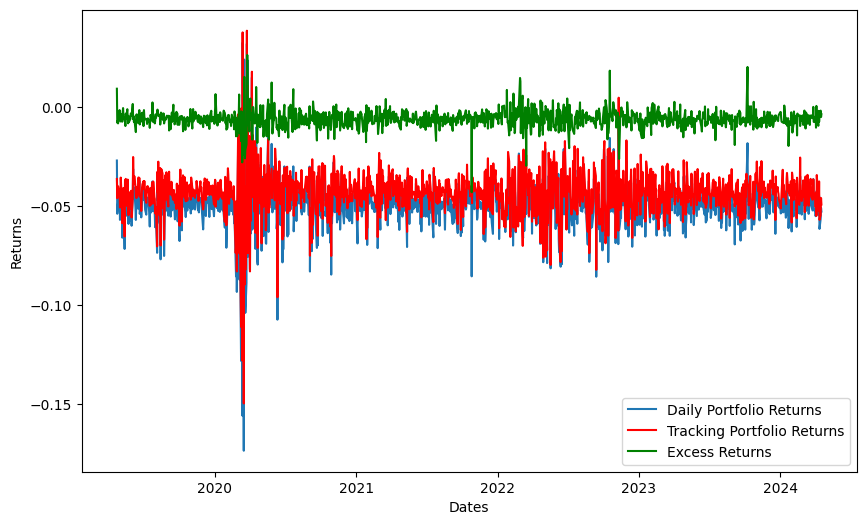

In [191]:
dates=df2.index
plt.figure(figsize=(10,6))
plt.plot(dates,daily_portfolio_return,label='Daily Portfolio Returns')
plt.plot(dates,daily_tracking_portfolio_return,color='red',label='Tracking Portfolio Returns')
plt.plot(dates,excess_return,color='green',label='Excess Returns')
plt.legend()
plt.xlabel('Dates')
plt.ylabel('Returns')
plt.show()